#**SHOES CATEGORY CLASSIFICATION USING CNN** 

Problem Statement :

E-commerce has rapidly grown and their business strategies are completely based on user actions and user experiences. Although it is completely based on users, we should also not forget to say that there is a technology bridge in between users and growth in business. It may be Machine Learning or Deep Learning. Companies apply many image classification techniques on data to improve their catalog and give best suggestions to the users. They need accurate product classification on their platforms for better user experience. But when you talk about products, there exists a huge variety and classifying within varieties is really challenging. As a Deep Learning engineer, you should always try cracking these kinds of challenges by classifying things within a product itself.

## **Import Basic Libraries**

In [35]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

import tensorflow as tf 
print(tf.__version__)
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

2.9.2


## **Setting up the Lenet Architecture** 

In [36]:
class Lenet:
    @staticmethod
    def build(width,height,depth,classes):
        #initialize the model
        model = Sequential()
        inputShape = (height,width,depth) #(h,h,channel)

        # if we are using "channel first", update input shape
        if K.image_data_format() == "channels_first":
            inputShape =(depth,height,width)
        
        #first set of conv => Relu =>Pool layers
        model.add(Conv2D(20,(5,5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

        #Second set of conv => Relu => Pool layers
        model.add(Conv2D(50,(5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

        #Third of conv => Relu => Pool layers
        model.add(Conv2D(50,(5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

        #Fourth set of conv => Relu => Pool layers
        model.add(Conv2D(50,(5,5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

        #first (and only) set of FC => Relu Layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        #softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        #return the constructed network architecture
        return model

In the above archictecture added four convolutional layer for better accuracy.

## **Mouting the drive with colab and extracting the data from archive file**

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import os
# os.chdir("/content/drive/MyDrive/CNN/Shoes Classification/")
os.chdir("/content/drive/MyDrive/CNN/Shoes Classification/dataset")

In [39]:
!dir

test  train


In [40]:
# !pip install patool

In [41]:
# import patoolib

In [42]:
# patoolib.extract_archive("dataset.rar")

In [43]:
!dir

test  train


In [44]:
# os.chdir("/content/drive/MyDrive/CNN/Shoes Classification/")

In [45]:
list(paths.list_images('train'))[-10:]

['train/Slippers/slippers (138).jpg',
 'train/Slippers/slippers (137).jpg',
 'train/Slippers/slippers (139).jpg',
 'train/Slippers/slippers (140).jpg',
 'train/Slippers/slippers (142).jpg',
 'train/Slippers/slippers (141).jpg',
 'train/Slippers/slippers (144).jpg',
 'train/Slippers/slippers (143).jpg',
 'train/Slippers/slippers (146).jpg',
 'train/Slippers/slippers (145).jpg']

## **Data Pre-processing**

In [46]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('train')))
random.seed(42)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]

        if label == "Boots":
            label = 0
        elif label == "Sandals":
            label = 1
        elif label == "Slippers":
            label = 2

        # print("pr: ", label)  

        labels.append(label)
        
        # update the progressbar
        pbar.update(1)

[INFO] loading images...


  0%|          | 0/778 [00:00<?, ?it/s]

In [47]:
data[0].shape

(28, 28, 3)

In [48]:
data = np.array(data, dtype='float')/255.0
labels = np.array(labels)

In [49]:
labels

array([1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2,
       0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1,
       2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2,
       1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2,

## **Train Test Split** 

In [50]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [51]:
print(trainX.shape)
print(trainY.shape)

(583, 28, 28, 3)
(583,)


In [52]:
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

In [53]:
trainY[0]

array([1., 0., 0.], dtype=float32)

## **Image Data Generator**

In [54]:
# from keras_preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
aug = ImageDataGenerator(
            rotation_range = 40,
            width_shift_range= 0.2,
            height_shift_range = 0.2,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            fill_mode = 'nearest')

## **Confing and model compilation**

In [55]:
INIT_LR = 1e-3
EPOCHS = 50
BS = 32

print("[INFO] compiling model......")
model = Lenet.build(width=28, height=28, depth=3, classes=3)
opt = Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[INFO] model compiled......")

[INFO] compiling model......
[INFO] model compiled......


In [56]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 20)        1520      
                                                                 
 activation_6 (Activation)   (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 20)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_7 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                  

## **Model Training with 100 epoch**

In [57]:
print("[INFO] training network")
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data = (testX,testY),
              steps_per_epoch = len(trainX)//BS,
              epochs=100,
              verbose=1)

[INFO] training network
Epoch 1/100
18/18 [==============================] - 1s 30ms/step - loss: 1.0494 - accuracy: 0.4192 - val_loss: 1.0303 - val_accuracy: 0.4359
Epoch 2/100
18/18 [==============================] - 0s 21ms/step - loss: 1.0335 - accuracy: 0.4301 - val_loss: 0.9998 - val_accuracy: 0.3795
Epoch 3/100
18/18 [==============================] - 0s 20ms/step - loss: 0.9566 - accuracy: 0.4701 - val_loss: 0.7836 - val_accuracy: 0.6718
Epoch 4/100
18/18 [==============================] - 0s 22ms/step - loss: 0.8487 - accuracy: 0.6080 - val_loss: 0.5773 - val_accuracy: 0.7179
Epoch 5/100
18/18 [==============================] - 0s 20ms/step - loss: 0.7180 - accuracy: 0.6606 - val_loss: 0.5668 - val_accuracy: 0.7077
Epoch 6/100
18/18 [==============================] - 0s 21ms/step - loss: 0.7512 - accuracy: 0.6479 - val_loss: 0.5561 - val_accuracy: 0.7385
Epoch 7/100
18/18 [==============================] - 0s 23ms/step - loss: 0.6792 - accuracy: 0.6897 - val_loss: 0.5146 - val

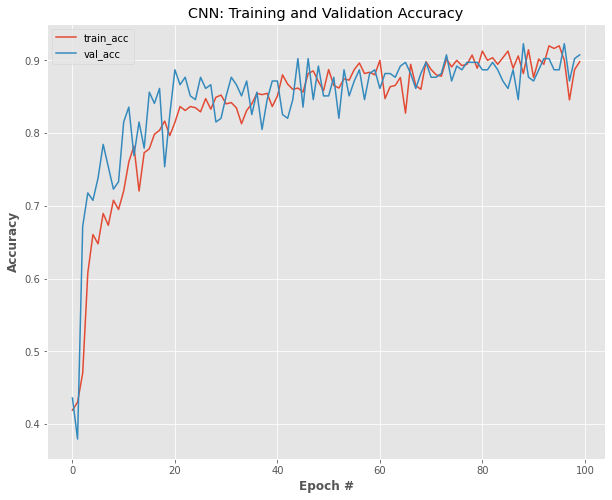

In [58]:
# plot the training and validation accuracy
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

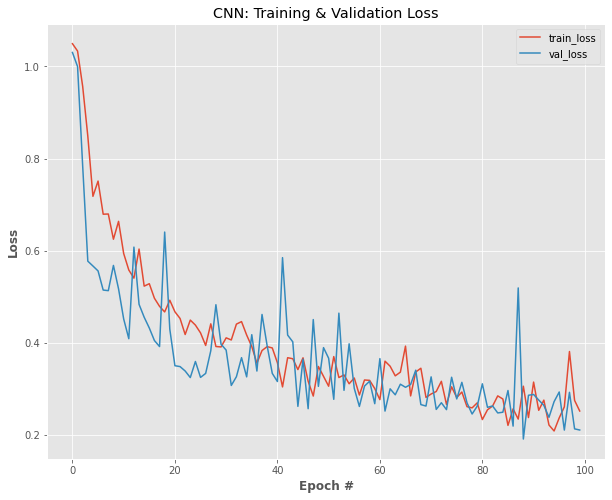

In [59]:
# plot the training and validation loss
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

## **Prediction for validation dataset, confusion matrix and model accuracy**

In [60]:
pred_prob = model.predict(testX, batch_size=32)

7/7 [==============================] - 0s 2ms/step


In [61]:
pred_prob

array([[8.39711905e-01, 1.57948017e-01, 2.34009279e-03],
       [9.99901772e-01, 9.82624988e-05, 1.86510718e-08],
       [2.41320653e-04, 9.42517757e-01, 5.72408959e-02],
       [9.96022701e-01, 3.93531146e-03, 4.19318167e-05],
       [7.25441694e-01, 2.60174751e-01, 1.43835461e-02],
       [4.33786988e-01, 5.55181503e-01, 1.10314507e-02],
       [9.19755220e-01, 7.99756944e-02, 2.69042270e-04],
       [1.13322320e-04, 1.52989011e-02, 9.84587789e-01],
       [2.41309826e-05, 9.98956561e-01, 1.01920275e-03],
       [9.48927191e-05, 9.99818265e-01, 8.68671996e-05],
       [2.34791223e-04, 9.57701623e-01, 4.20635007e-02],
       [9.91932452e-01, 7.94151891e-03, 1.26092680e-04],
       [1.25568240e-05, 9.99703944e-01, 2.83479254e-04],
       [9.99979615e-01, 2.03956588e-05, 2.14430473e-09],
       [9.98146653e-01, 1.85186020e-03, 1.59789124e-06],
       [9.86934028e-05, 9.93516326e-01, 6.38499763e-03],
       [6.70542009e-04, 9.28352892e-01, 7.09765553e-02],
       [3.48929134e-05, 9.99533

In [62]:
test_y = [ np.argmax(i)  for i in testY]
pred_y = [ np.argmax(i)  for i in pred_prob]

In [63]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [64]:
def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.tight_layout()
    
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    print("-----------------------------------------------------")
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

Confusion Matrix, Without Normalisation


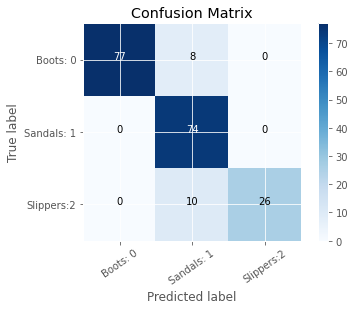

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        85
           1       0.80      1.00      0.89        74
           2       1.00      0.72      0.84        36

    accuracy                           0.91       195
   macro avg       0.93      0.88      0.89       195
weighted avg       0.93      0.91      0.91       195

-----------------------------------------------------
Accuracy of the model:  0.9076923076923077


In [65]:
plot_confusion_metrix(test_y, pred_y,classes=["Boots: 0","Sandals: 1","Slippers:2"])

## **Prediction on test dataset**

In [66]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [68]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2

# # load the model 
print("[INFO] loading network and...")
# model = load_model(MODEL)

# grab the image paths and randomly shuffle themt
testImagePaths = sorted(list(paths.list_images('test')))   # data folder with 3 categorical folders

all_class = ["Boots", "Sandals", "Slippers"]


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        
        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf = model.predict(image)[0]

        # build the label
        label = all_class[np.argmax(prd_conf)]
        proba = prd_conf[np.argmax(prd_conf)]

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)
        
        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)
        
        pbar.update(1)


Output hidden; open in https://colab.research.google.com to view.